## Scenario

You worked on creating market segmentation groups using kmeans on customer shopping records, but you're not sure kmeans was the best method. By the end of this lesson, you want to find the appropriate number of groups and their descriptions.

# Hierchical Clustering 
Agenda today:
- Hierarchical Clustering 
    -  Introduction
    -  How the algorithm is constructed?
    -  Implementing hierarchical algorithm

Goals today:
- Understand how hierarchical clustering finds clusterings in observations
- Compare and contrast hierchical clustering and k-means
- Build and interpret a dendrogram
***

# Introduction 

### Supervised vs. Unsupervised Machine Learning 
Recall from our previous lesson in supervised learning, where we use a number of features to predict a label. In unsupervised ML problem, we are not predicting and labels, thus we do not have a ground truth to compare our models to. In other words, we are doing the best we can to group individual observations together without having a gold standard to evaluate them. 

### Intuition
Clustering is a family of techniques for identifying clusters in a dataset. The goal of clustering is to group the most similar observations together into a cluster. In Hierchical Clustering, we prioritize **similarity** between individual observations.


### PCA vs. Clustering
Both PCA and clustering are unsupervised algorithms. The difference between them are, according to ISLR:
- PCA looks to find low-dimensional representation of the observations that explain a good fraction of the variance 
- Clustering looks to find homogenous subgroups among the observations
***

# Hierarchical Agglomerative Clustering
Recall K-means clustering where the goal is to assign individual observations to pre-specified number of clusters according to Euclidean distance between the centroid and the observation, Hierarchical clustering sets out to group the most similar two observations together from a bottom-up level. We end up with a tree-like diagram named **dendrogram**, which allows us to view the clusterings obtained for each possible number of clusters, from 1 to n. It is up to our discretion as data scientists to decide how many clusters we want. 

![dendo](img/dendogram.png)

***
One disadvantage of K-means clustering is that we have to specify the number of clusters beforehand. The type of hierchical clustering we will learn today is **agglomerative**, or **bottom up**, such that we do not have to specify the number of clusters beforehand. We will now dive into the details of hierchical clustering.
***

### How does the algorithm work
Initially, every observation is its own cluster. As we move up the leaf of the dendrogram, the most similar pair of observation fuse together, and the next most similar group of leafs fuse together etc. until everything fuse together into a big cluster. Where to cut off branching that fuse together the tree is up to our discretion. 

![dendo2](img/400_Basic_Dendrogram.png)

## Aglomerative example

In [1]:
from hier_example import *

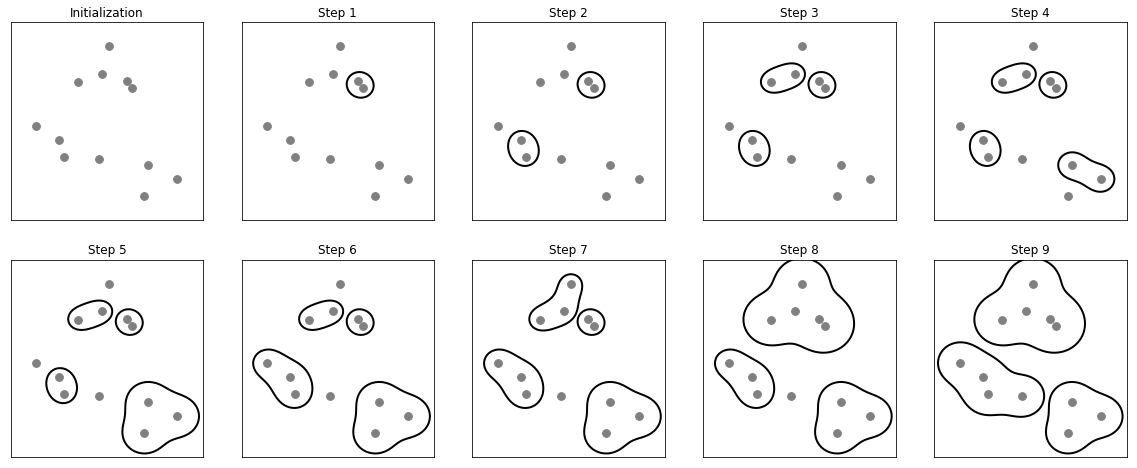

In [2]:
plot_agglomerative_algorithm()

### Types of hierarchical aggplomerative clustering 
- Single Linkage 
    -  Minimum pair-wise distance: for any two clusters, take one observation from each and determine their distance. Do this over and over, until you have identified the overall minimum pair-wise distance. 
- Complete Linkage
    -  Nearest may be defined as the furthest (or maximum) distance between two clusters. That is, all possible pairwise distances between elements (one from cluster A and one from B) are evaluated and the largest value is used as the distance between clusters A & B. This is sometimes called complete linkage and is also called furthest neighbor.
- Average Linkage
    - The distance between clusters is defined as the average distance between the average values of each of the data points in the clusters. 
- Ward Linkage
    -  Ward method finds the pair of clusters that leads to minimum increase in total within-cluster variance after merging at each step.

I really like how **[this article](https://towardsdatascience.com/understanding-the-concept-of-hierarchical-clustering-technique-c6e8243758ec)** describes the pros and cons of each approach.

### How well does the dendogram fit the data?
cophenetic correlation coefficient $c$ is given by [ref](https://www.mathworks.com/help/stats/index.html?/access/helpdesk/help/toolbox/stats/cophenet.html=)

![c-coef](img/cophenet.png)


$x(i, j) = | Xi − Xj |$, the ordinary Euclidean distance between the $i$th and $j$th observations.<br>
$t(i, j)$ = the dendrogrammatic distance between the model points $Ti$ and $Tj$. This distance is the height of the node at which these two points are first joined together.<br>

Then, letting ${\bar {x}}$ be the average of the $x(i, j)$, and letting ${\bar {t}}$ be the average of the $t(i, j)$, the cophenetic correlation coefficient $c$ is given by[4]

## Seeing it in action

**[This post here](https://www.analyticsvidhya.com/blog/2019/05/beginners-guide-hierarchical-clustering/)** walks through cluster assignment _step_ by _step_ if the demo would be helpful.

Meanwhile, we can do it in _**scipy**_ and _**sklearn**_

### Hierarchical clustering with `scipy`

(100, 2)


Text(0.5, 1.0, 'Sample data for clustering demo')

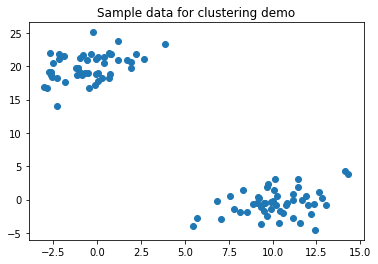

In [3]:
# lets generate some data and look at an example of hierarchical agglomerative clustering 
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
# generate two clusters: a with 100 points, b with 50:
np.random.seed(1000)  
a = np.random.multivariate_normal([10, 0], [[3, 1], [1, 4]], size=[50,])
b = np.random.multivariate_normal([0, 20], [[3, 1], [1, 4]], size=[50,])
X = np.concatenate((a, b),)
print(X.shape)  # 150 samples with 2 dimensions
plt.scatter(X[:,0], X[:,1])
plt.title("Sample data for clustering demo")

In [4]:
# construct dendrogram in scipy
from scipy.cluster.hierarchy import dendrogram, linkage
Z = linkage(X, 'single')

In [5]:
from scipy.cluster.hierarchy import cophenet
from scipy.spatial.distance import pdist

c, coph_dists = cophenet(Z, pdist(X))
c

0.9822850702462892

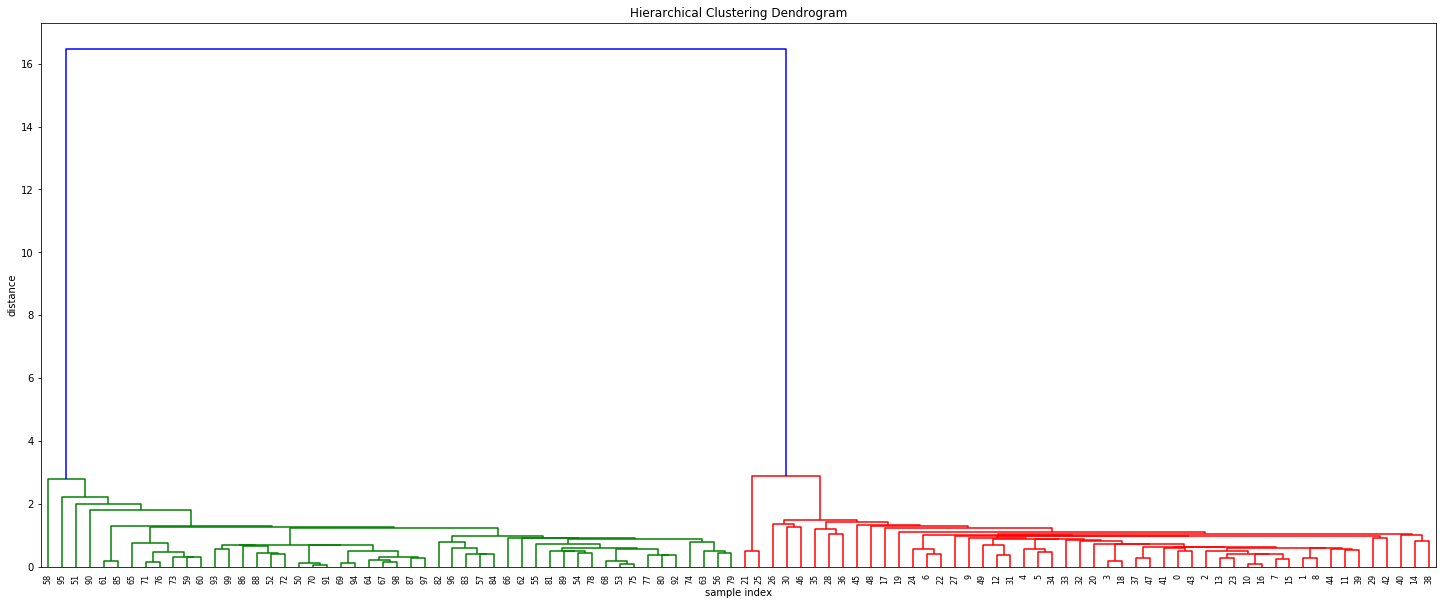

In [6]:
# calculate and construct the dendrogram 
# calculate full dendrogram
plt.figure(figsize=(25, 10))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('sample index')
plt.ylabel('distance')
dendrogram(
    Z,
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=8.,  # font size for the x axis labels
)
plt.show()

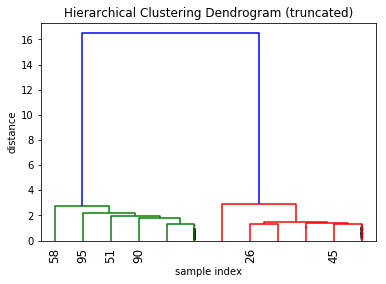

In [7]:
# trimming and truncating the dendrogram 
plt.title('Hierarchical Clustering Dendrogram (truncated)')
plt.xlabel('sample index')
plt.ylabel('distance')
dendrogram(
    Z,
    truncate_mode='lastp',  # show only the last p merged clusters
    p=12,  # show only the last p merged clusters
    show_leaf_counts=False,  # otherwise numbers in brackets are counts
    leaf_rotation=90.,
    leaf_font_size=12.,
    show_contracted=True,  # to get a distribution impression in truncated branches
)
plt.show()

# from documentation of "lastp"
# The last p non-singleton formed in the linkage are the only non-leaf nodes in the linkage; 
# they correspond to rows Z[n-p-2:end] in Z. All other non-singleton clusters are contracted into leaf nodes.

### Hierarchical clustering with `sklearn` on Iris (because it's there)

**[Documentation](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html)** for AgglomerativeClustering in `sklearn`


**[A great example of using manhattan distance](https://scikit-learn.org/stable/auto_examples/cluster/plot_agglomerative_clustering_metrics.html#sphx-glr-auto-examples-cluster-plot-agglomerative-clustering-metrics-py)** with agglomerative clustering in `sklearn`.

In [8]:
# we can also use the scikitlearn module hierarchical clustering to perform the same task 
from sklearn.datasets import make_blobs
from sklearn.datasets import make_moons
from sklearn.cluster import AgglomerativeClustering
from sklearn.neighbors import KernelDensity
np.random.seed(2000)

In [9]:
# try clustering on the iris dataset 
from sklearn.datasets import load_iris
iris = load_iris()
# in this case, we won't be working with predicting labels, so we will only use the features (X)
X_iris = iris.data
y_iris = iris.target

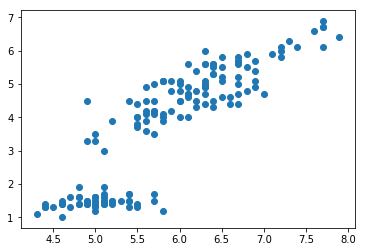

In [10]:
plt.scatter(X_iris[:,0],X_iris[:,2]) #c = y_iris)

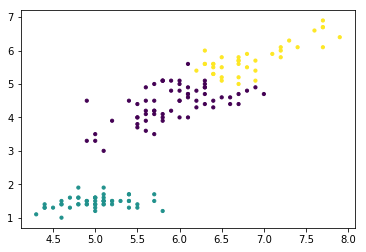

In [11]:
iris_cluster = AgglomerativeClustering(n_clusters=3)
iris_cluster
pred_iris_clust = iris_cluster.fit_predict(X_iris)
plt.scatter(X_iris[:, 0], X_iris[:, 2], c = pred_iris_clust, s = 10);

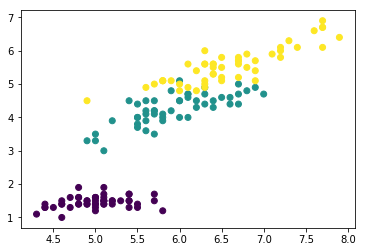

In [12]:
# compare it to the actual truth 
plt.scatter(X_iris[:,0],X_iris[:,2], c = y_iris)

#### Evaluate

To evaluate you might try different numbers of clusters and compare their silhouette score as you did w kmeans.

In [13]:
# evaluation - silhouette score 
from sklearn.metrics import silhouette_score
silhouette_score(X_iris, pred_iris_clust)

0.5543236611296415

### Evaluating number of clusters / Cut points
For hierarchical agglomerative clustering, or clustering in general, it is generally difficult to truly evaluate the results. Therefore, it is up you, the data scientists, to decide.

**[Standford has a good explaination on page 380](https://nlp.stanford.edu/IR-book/pdf/17hier.pdf)** of your options for picking the cut-off. 

When we are viewing dendrograms for hierarchical agglomerative, we can visually examine where the natural cutoff is, despite it not sounding exactly statistical, or scientific. We might want to interpret the clusters and assign meanings to them depending on domain-specific knowledge and shape of dendrogram. However, we can evaluate the quality of our clusters using measurements such as Sihouette score discussed in the k-means lectures. 



## Advantages & Disadvantages of hierarchical clustering

#### Advantages
- Intuitive and easy to implement
- More informative than k-means because it takes individual relationship into consideration
- Allows us to look at dendrogram and decide number of clusters

#### Disadvantages
- Very sensitive to outliers
- Cannot undo the previous merge, which might lead to problems later on 


### Further reading

- [from MIT on just hierarchical](http://web.mit.edu/6.S097/www/resources/Hierarchical.pdf)
- [from MIT comparing clustering methods](http://www.mit.edu/~9.54/fall14/slides/Class13.pdf)
- [fun CMU slides on clustering](http://www.cs.cmu.edu/afs/andrew/course/15/381-f08/www/lectures/clustering.pdf)

### Find those clusters!!! 

In [14]:
shop = pd.read_excel('Online Retail.xlsx')

In [15]:
shop.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [16]:
country = shop.groupby('CustomerID').agg({'Country':'max'})
country.head()

,Country
CustomerID,
12346.0,United Kingdom
12347.0,Iceland
12348.0,Finland
12349.0,Italy
12350.0,Norway


In [17]:
import numpy as np
shop['TotalPrice'] = np.multiply(shop['Quantity'], shop['UnitPrice'])

In [26]:
frequency = shop.groupby('CustomerID').agg({'InvoiceNo':'nunique'})
frequency.columns = ['frequency']
frequency.head()

,frequency
CustomerID,
12346.0,2
12347.0,7
12348.0,4
12349.0,1
12350.0,1


In [28]:
monetary = shop.groupby('CustomerID').agg({'TotalPrice': 'sum'})
monetary.columns = ['monetary']
monetary.describe()

,monetary
count,4372.000000
mean,1898.459701
std,8219.345141
min,-4287.630000
25%,293.362500
50%,648.075000
75%,1611.725000
max,279489.020000


In [29]:
import datetime as dt
lastDate= dt.datetime(2011,12,13)
recency = shop.groupby('CustomerID').agg({'InvoiceDate': lambda x:(lastDate - x.max()).days})
recency.columns = ['Recency']

In [30]:
duration = shop.groupby('CustomerID').agg({'InvoiceDate': lambda x:(lastDate - x.min()).days})
duration.columns = ['duration']

In [31]:
new_df = pd.merge(frequency, monetary, left_index=True, right_index=True)

In [32]:
new_df = pd.merge(new_df, recency, left_index=True, right_index=True)

In [33]:
new_df = pd.merge(new_df, duration, left_index=True, right_index=True)

In [34]:
new_df.head()

,frequency,monetary,Recency,duration
CustomerID,,,,
12346.0,2,0.00,328,328
12347.0,7,4310.00,5,370
12348.0,4,1797.24,78,361
12349.0,1,1757.55,21,21
12350.0,1,334.40,313,313


In [35]:
filtered_df = new_df[new_df['monetary']>0]

In [36]:
filtered_df.quantile([0.9, 0.95, 0.995, 0.9999])

,frequency,monetary,Recency,duration
0.9000,11.0000,3540.043000,263.0,370.0
0.9500,16.0000,5664.179000,313.0,374.0
0.9950,52.0000,33404.391200,375.0,376.0
0.9999,237.6296,269528.885987,376.0,376.0


In [37]:
filtered_df = filtered_df[filtered_df['frequency']<=52]
filtered_df = filtered_df[filtered_df['monetary']<=33404.391200]
filtered_df.describe()


,frequency,monetary,Recency,duration
count,4293.000000,4.293000e+03,4293.000000,4293.000000
mean,4.625204,1.453177e+03,93.446541,226.897973
std,5.701326,2.482303e+03,99.227201,118.125604
min,1.000000,1.243450e-14,3.000000,3.000000
25%,1.000000,3.008500e+02,20.000000,116.000000
50%,3.000000,6.528000e+02,53.000000,252.000000
75%,5.000000,1.601860e+03,141.000000,332.000000
max,52.000000,3.335076e+04,376.000000,376.000000


In [38]:
from sklearn.preprocessing import Normalizer, StandardScaler

In [39]:
normalizer = Normalizer()
scaler = StandardScaler()
normed_df = normalizer.fit_transform(filtered_df)
scaled_df = scaler.fit_transform(filtered_df)

/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.7/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [40]:
normed_df = pd.DataFrame(normed_df)
normed_df.columns = filtered_df.columns
normed_df.head()

,frequency,monetary,Recency,duration
0,0.001618,0.996333,0.001156,0.085532
1,0.002180,0.979529,0.042511,0.196752
2,0.000569,0.999857,0.011947,0.011947
3,0.001803,0.602780,0.564205,0.564205
4,0.006986,0.981468,0.024768,0.189891


In [41]:
scaled_df = pd.DataFrame(scaled_df)
scaled_df.columns = filtered_df.columns
scaled_df.head()

,frequency,monetary,Recency,duration
0,0.416583,1.151010,-0.891458,1.211581
1,-0.109672,0.138623,-0.155687,1.135382
2,-0.635927,0.122631,-0.730193,-1.743246
3,-0.635927,-0.450754,2.212892,0.728987
4,1.118255,0.037161,-0.548770,0.610456


In [42]:
from sklearn.cluster import KMeans
from sklearn import metrics

# K-means Using Normed Data

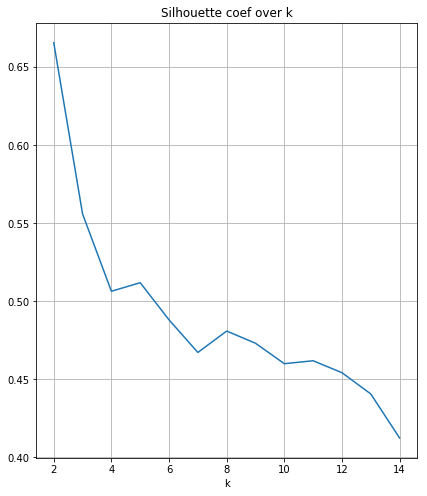

In [43]:
X = normed_df
silhouette_plot = []
for k in range(2, 15):
    clusters = KMeans(n_clusters= k, random_state=1)
    cluster_labels = clusters.fit_predict(X)
    silhouette_avg = metrics.silhouette_score(X, cluster_labels)
    silhouette_plot.append(silhouette_avg)

plt.figure(figsize=(15,8))
plt.subplot(121, title='Silhouette coef over k')
plt.xlabel('k')
plt.plot(range(2, 15), silhouette_plot)
plt.grid(True)

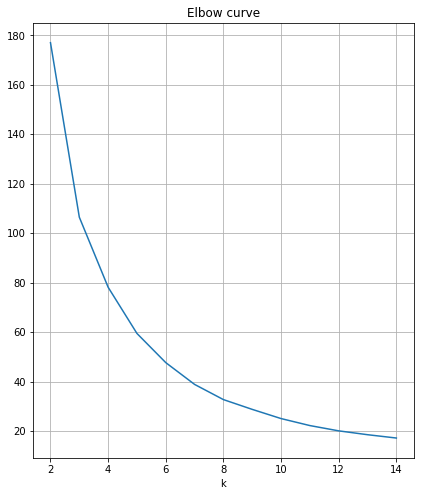

In [44]:
X = normed_df
distortions = []
for k in range(2, 15):
    test2 = KMeans(n_clusters=k, random_state=10).fit(X)
    distortions.append(test2.inertia_)
    # Plot values of SSE
plt.figure(figsize=(15,8))
plt.subplot(121, title='Elbow curve')
plt.xlabel('k')
plt.plot(range(2, 15), distortions)
plt.grid(True)

# K-means Using Scaled Data

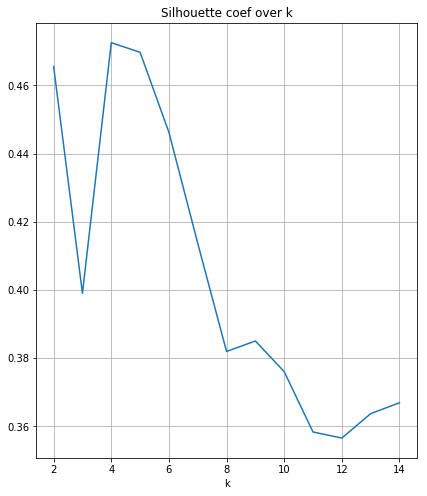

In [45]:
X = scaled_df
silhouette_plot = []
for k in range(2, 15):
    clusters = KMeans(n_clusters= k, random_state=1)
    cluster_labels = clusters.fit_predict(X)
    silhouette_avg = metrics.silhouette_score(X, cluster_labels)
    silhouette_plot.append(silhouette_avg)

plt.figure(figsize=(15,8))
plt.subplot(121, title='Silhouette coef over k')
plt.xlabel('k')
plt.plot(range(2, 15), silhouette_plot)
plt.grid(True)

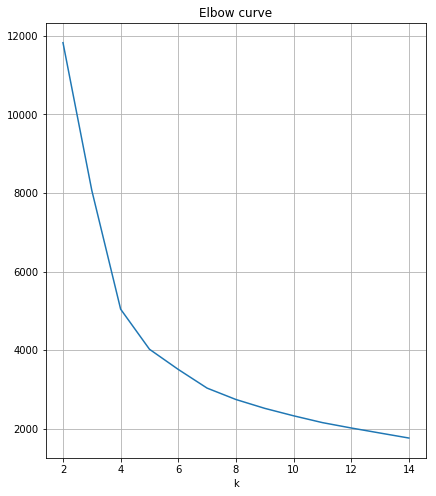

In [46]:
X = scaled_df
distortions = []
for k in range(2, 15):
    test2 = KMeans(n_clusters=k, random_state=10).fit(X)
    distortions.append(test2.inertia_)
    # Plot values of SSE
plt.figure(figsize=(15,8))
plt.subplot(121, title='Elbow curve')
plt.xlabel('k')
plt.plot(range(2, 15), distortions)
plt.grid(True)

# Hierarchical Clusters Using Normed Data

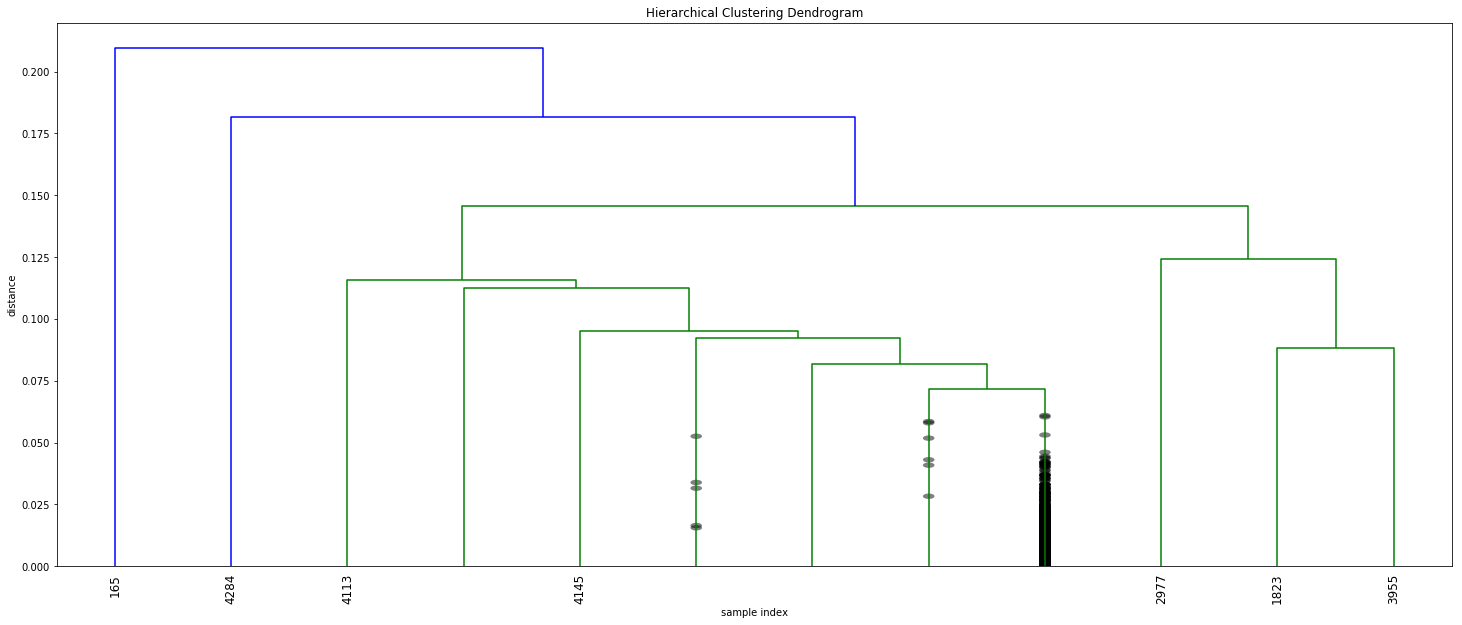

In [47]:
X = normed_df
Z = linkage(X, 'single')
c, coph_dists = cophenet(Z, pdist(X))
c
plt.figure(figsize=(25, 10))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('sample index')
plt.ylabel('distance')
dendrogram(
    Z,
    truncate_mode='lastp',  # show only the last p merged clusters
    p=12,  # show only the last p merged clusters
    show_leaf_counts=False,  # otherwise numbers in brackets are counts
    leaf_rotation=90.,
    leaf_font_size=12.,
    show_contracted=True,  # to get a distribution impression in truncated branches
)
plt.show()

# Hierarchical Clusters Using Scaled Data

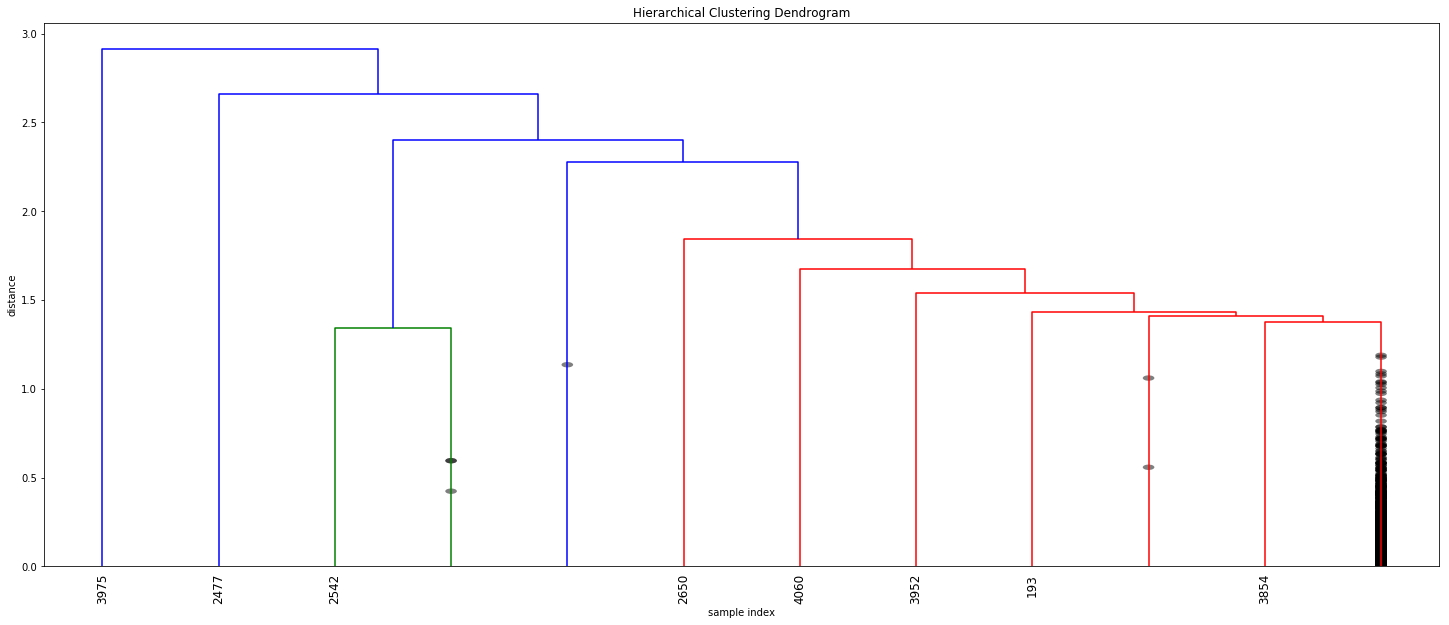

In [48]:
X = scaled_df
Z = linkage(X, 'single')
c, coph_dists = cophenet(Z, pdist(X))
c
plt.figure(figsize=(25, 10))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('sample index')
plt.ylabel('distance')
dendrogram(
    Z,
    truncate_mode='lastp',  # show only the last p merged clusters
    p=12,  # show only the last p merged clusters
    show_leaf_counts=False,  # otherwise numbers in brackets are counts
    leaf_rotation=90.,
    leaf_font_size=12.,
    show_contracted=True,  # to get a distribution impression in truncated branches
)
plt.show()

# K-means Classification Using Scaled Data

In [49]:
X = scaled_df
clusters = KMeans(n_clusters= 4, random_state=1)
cluster_labels = clusters.fit_predict(X)
Scaled_km = filtered_df.copy()
Scaled_km['cluster'] = cluster_labels
Scaled_km = pd.merge(Scaled_km, country, left_index=True, right_index=True)
Scaled_km.head()

,frequency,monetary,Recency,duration,cluster,Country
CustomerID,,,,,,
12347.0,7,4310.00,5,370,0,Iceland
12348.0,4,1797.24,78,361,0,Finland
12349.0,1,1757.55,21,21,2,Italy
12350.0,1,334.40,313,313,3,Norway
12352.0,11,1545.41,39,299,0,Norway


In [50]:
Scaled_km.groupby('cluster').mean().T

cluster,0,1,2,3
frequency,6.580153,23.855615,2.119374,1.800200
monetary,1885.428060,9950.954973,638.179440,435.002868
Recency,42.010178,18.497326,51.477495,252.499500
duration,309.904580,349.475936,88.579256,285.473526


In [51]:
Scaled_km.groupby('cluster').min().T

cluster,0,1,2,3
frequency,2,3,1,1
monetary,36.56,1296.44,1.24345e-14,4.26326e-14
Recency,3,3,3,125
duration,134,5,3,166
Country,Australia,Belgium,Australia,Australia


In [52]:
Scaled_km.groupby('cluster').max().T

cluster,0,1,2,3
frequency,24,52,11,12
monetary,9861.38,33350.8,8393.22,4464.1
Recency,193,305,165,376
duration,376,376,229,376
Country,Unspecified,United Kingdom,Unspecified,Unspecified


In [53]:
Scaled_km.groupby('cluster').count().T

cluster,0,1,2,3
frequency,1572,187,1533,1001
monetary,1572,187,1533,1001
Recency,1572,187,1533,1001
duration,1572,187,1533,1001
Country,1572,187,1533,1001


In [54]:
for cluster in [0,1,2,3,4]:
    test = Scaled_km[Scaled_km['cluster']==cluster]
    print(cluster, '\n', test['Country'].value_counts(normalize=True))

0 
 United Kingdom        0.910941
Germany               0.020992
France                0.017812
Spain                 0.008270
Belgium               0.006361
Switzerland           0.004453
Portugal              0.004453
Italy                 0.003181
Channel Islands       0.003181
Australia             0.002545
Denmark               0.002545
Netherlands           0.001908
Finland               0.001908
Norway                0.001908
Sweden                0.001272
Poland                0.001272
Austria               0.001272
Cyprus                0.001272
Czech Republic        0.000636
Iceland               0.000636
Unspecified           0.000636
European Community    0.000636
Japan                 0.000636
Malta                 0.000636
EIRE                  0.000636
Name: Country, dtype: float64
1 
 United Kingdom    0.860963
Germany           0.048128
France            0.042781
Spain             0.010695
Finland           0.005348
Singapore         0.005348
Sweden            0.00534

# Hierarchical Clusters Using Normed Data

In [55]:
X = normed_df
norm_cluster = AgglomerativeClustering(n_clusters=4)
pred_norm_clust = norm_cluster.fit_predict(X)

In [56]:
Normed_hc = filtered_df.copy()
Normed_hc['cluster'] = pred_norm_clust
Normed_hc = pd.merge(Normed_hc, country, left_index=True, right_index=True)
Normed_hc.head()

,frequency,monetary,Recency,duration,cluster,Country
CustomerID,,,,,,
12347.0,7,4310.00,5,370,3,Iceland
12348.0,4,1797.24,78,361,3,Finland
12349.0,1,1757.55,21,21,3,Italy
12350.0,1,334.40,313,313,0,Norway
12352.0,11,1545.41,39,299,3,Norway


In [57]:
Normed_hc.groupby('cluster').mean().T

cluster,0,1,2,3
frequency,1.814536,2.862327,1.241071,6.889739
monetary,303.200840,574.486245,120.208185,2438.276603
Recency,189.869674,80.432231,264.255952,38.476598
duration,246.907268,222.637140,277.693452,213.827633


In [58]:
Normed_hc.groupby('cluster').min().T

cluster,0,1,2,3
frequency,1,1,1,1
monetary,30,49.8,1.24345e-14,41.99
Recency,4,4,3,3
duration,17,18,10,3
Country,Australia,Australia,Austria,Australia


In [59]:
Normed_hc.groupby('cluster').max().T

cluster,0,1,2,3
frequency,9,15,6,52
monetary,904.67,2002.4,252.8,33350.8
Recency,376,375,376,333
duration,376,376,376,376
Country,United Kingdom,Unspecified,United Kingdom,United Kingdom


In [60]:
Normed_hc.groupby('cluster').count().T

cluster,0,1,2,3
frequency,798,937,336,2222
monetary,798,937,336,2222
Recency,798,937,336,2222
duration,798,937,336,2222
Country,798,937,336,2222
